In [2]:
import numpy as np
import pandas as pd
import pickle
import glob
import gzip

## Read Data

In [10]:
# read data dictionary (column names)
data_dict = pd.read_csv('./data/pems/station_dict.csv', names=['Feature', 'Description', 'Unit']).iloc[1:].reset_index(drop=True)
colnames = data_dict['Feature'].values.tolist()
colnames_subset = ['Timestamp', 'Station', 'Station Length', 'Samples', 'Total Flow', 'Avg Occupancy', 'Avg Speed', 'Lane N Samples', 'Lane N Flow', 'Lane N Avg Occ', 'Lane N Avg Speed', 'Lane N Observed']

In [106]:
# get list of files (one file for each day)
files = glob.glob('./data/pems/*.gz')

# unzip a file
# picking Tuesday June 1st as an example day
with gzip.open(files[151]) as f:
    df = pd.read_csv(f, index_col=False, names=colnames)[colnames_subset]

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [113]:
# preview
df[df['Total Flow'].isna() == False].sample(5)

,Timestamp,Station,Station Length,Samples,Total Flow,Avg Occupancy,Avg Speed,Lane N Samples,Lane N Flow,Lane N Avg Occ,Lane N Avg Speed,Lane N Observed
1307287,2021-06-01 22:10:00,764120,1.230,0,51.0,0.0255,65.2,0.0,11.0,0.0181,70.6,0
1256984,2021-06-01 21:20:00,717787,0.485,0,453.0,0.0663,67.5,0.0,99.0,0.0676,72.1,0
911259,2021-06-01 15:25:00,771577,0.485,9,123.0,0.0759,61.1,0.0,26.0,0.0538,66.2,0
498700,2021-06-01 08:25:00,767509,0.450,0,242.0,0.0585,60.9,0.0,61.0,0.0526,65.8,0
1037980,2021-06-01 17:35:00,766642,0.270,40,323.0,0.0793,68.0,10.0,123.0,0.0853,70.7,1


## Example Station

Stations with most samples: 760375, 769926, 769402, 776657, 716237, 774946, 771690, 716312

In [114]:
# pick example station
example_station = 760375
df_sub = df[df['Station'] == example_station]
df_sub.index = list(df_sub['Timestamp'])

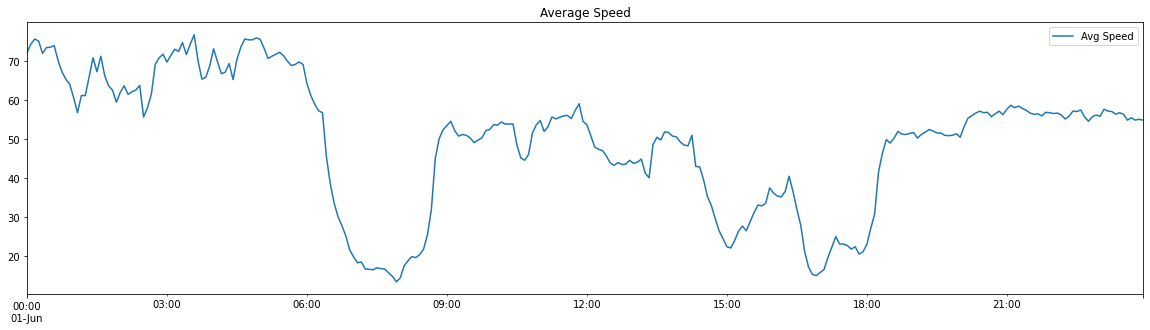

In [115]:
# average speed
p = df_sub[['Avg Speed']].plot(figsize=[20, 5], title='Average Speed', color='tab:blue')

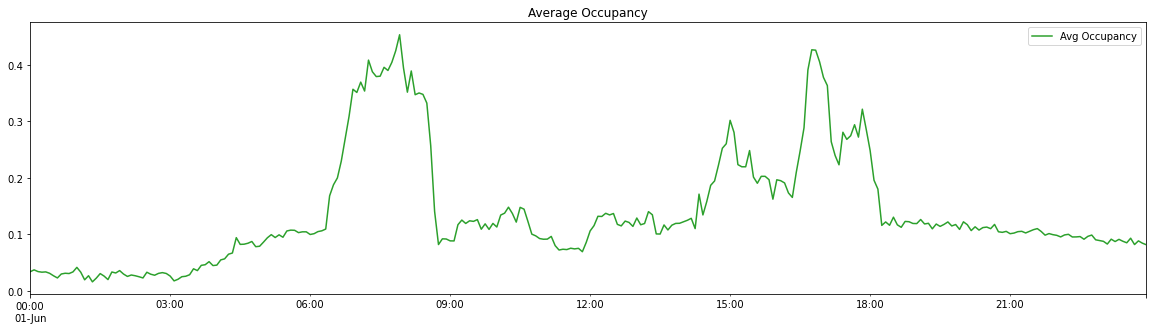

In [116]:
# average occupancy
p = df_sub[['Avg Occupancy']].plot(figsize=[20, 5], title='Average Occupancy', color='tab:green')

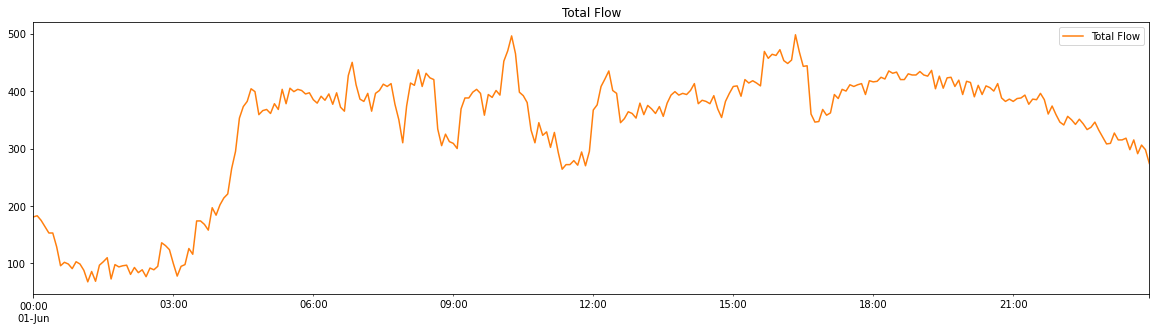

In [117]:
# total flow
p = df_sub[['Total Flow']].plot(figsize=[20, 5], title='Total Flow', color='tab:orange')

## Correlation

In [170]:
# correlation between speed and occupancy
corrs = []
for s in [760375, 769926, 769402, 776657, 716237, 774946, 771690, 716312]:
    df_sub = df[df['Station'] == s]
    corr = df_sub[['Avg Speed', 'Avg Occupancy']].corr()['Avg Speed']['Avg Occupancy']
    corrs.append(corr)

print(np.mean(corrs))

-0.8771363480983714


In [171]:
# correlation between rush hour and occupancy
# rush hour is an indicator of timestamp during morning or evening commute
corrs = []
for s in [760375, 769926, 769402, 776657, 716237, 774946, 771690, 716312]:
    df_sub = pd.DataFrame(df[df['Station'] == s])
    df_sub['Rush Hour'] = [1 if (x.hour >= 7 and x.hour <= 9) or (x.hour >= 16 and x.hour <= 18) else 0 for x in df_sub['Timestamp']]
    corr = df_sub[['Rush Hour', 'Avg Occupancy']].corr()['Rush Hour']['Avg Occupancy']
    corrs.append(corr)

print(np.mean(corrs))

0.5026169277674728
